In [1]:
from enum import Enum

In [2]:
class AspectType(Enum):
    SETTING = 0
    SCENE = 1
    PLAYER = 2
    NPC = 3

In [3]:
class Aspect:
    def __init__(self, Type=0, name='', free=0):
        self.type = AspectType(Type)
        self.name = name
        self.invokes = 0
        self.free = free
    def __repr__(self):
        return '{}\n{} Aspect'.format(self.name, self.type.name)

In [4]:
class Scene:
    def __init__(self, name='', aspects = []):
        self.name = name
        self.aspects = aspects
    def __repr__(self):
        return self.name+'\n'+'\n'.join(self.aspects)

In [5]:
class GameState:
    def __init__(self):
        self.scene = None
        self.aspects = None
    def NewScene(self, name='', aspects=[]):
        self.scene = Scene(name, aspects)
    def ShowScene(self):
        print(self.scene)

In [6]:
state = GameState()
state.NewScene('Clash With a Kaiju', ['Buildings on Fire', 'Lightning Storm', 'Kidnapped President'])
state.ShowScene()

Clash With a Kaiju
Buildings on Fire
Lightning Storm
Kidnapped President


In [7]:
state.scene

Clash With a Kaiju
Buildings on Fire
Lightning Storm
Kidnapped President

In [9]:
Scene('Secret Moon Nazi Warehouse', ['Broken Glass', 'Moon Lasers'])

Secret Moon Nazi Warehouse
Broken Glass
Moon Lasers

In [9]:
class Character:
    def __init__(self, name='', 
                 highConcept=Aspect(), 
                 trouble=Aspect(), 
                 aspect1=Aspect(), 
                 aspect2=Aspect(), 
                 aspect3=Aspect(),
                 careful=0,
                 clever=0,
                 flashy=0,
                 forceful=0,
                 quick=0,
                 sneaky=0,
                 stunts=[]):
        self.name = name
        self.highConcept = highConcept
        self.trouble = trouble
        self.aspect1 = aspect1
        self.aspect2 = aspect2
        self.aspect3 = aspect3
        self.aspects = {self.highConcept.name : self.highConcept, 
                        self.trouble.name : self.trouble, 
                        self.aspect1.name : self.aspect1, 
                        self.aspect2.name : self.aspect2, 
                        self.aspect3.name : self.aspect3}
        self.careful = careful
        self.clever = clever
        self.flashy = flashy
        self.forceful = forceful
        self.quick = quick
        self.sneaky = sneaky
        self.approaches = {'Careful': self.careful,
                           'Clever': self.clever,
                           'Flashy': self.flashy,
                           'Forceful': self.forceful,
                           'Quick': self.quick,
                           'Sneaky': self.sneaky}
        if(len(stunts) <= 3):
            self.refresh = 3
        else:
            self.refresh = 3-(len(stunts)-3)
        self.stunts = stunts
    def displayAspects(self):
        aspectString = "High Concept: {}\nTrouble: {}\n".format(self.highConcept.name, self.trouble.name)
        aspectString += "Aspect: {}\nAspect: {}\nAspect: {}\n".format(self.aspect1.name, self.aspect2.name, self.aspect3.name)
        return aspectString
    def displayApproaches(self):
        return '\n'.join(['{}: {}'.format(x, self.approaches[x]) for x in self.approaches])
    def displayStunts(self):
        return '\n'.join(self.stunts)
    def displayInfo(self):
        infoString = ''
        infoString += 'Name: {}\n'.format(self.name)
        infoString += 'Refresh: {}\n'.format(self.refresh)
        return infoString
    def __repr__(self):
        return self.displayInfo() + self.displayAspects() + self.displayApproaches() + '\nStunts:\n' + self.displayStunts()
        

In [10]:
harix = Character(name='Harix', 
                highConcept=Aspect(2, 'Gobbie Samurai in Search of Friendyfriends'),
                trouble=Aspect(2, 'No Understanding of Uplanders'),
                aspect1=Aspect(2, 'The Strength of Ten Goblins'),
                aspect2=Aspect(2, 'Good Intentions, not Good Plans'),
                aspect3=Aspect(2, 'Determined but Clumsy'),
                careful=1,
                clever=1,
                flashy=2,
                forceful=3,
                quick=2,
                sneaky=0,
                stunts=['Noble Goblin War Cry', 'Slashyslashing Whirlycogs', 'Gobbiekin Tongueflappage'])

In [11]:
harix

Name: Harix
Refresh: 3
High Concept: Gobbie Samurai in Search of Friendyfriends
Trouble: No Understanding of Uplanders
Aspect: The Strength of Ten Goblins
Aspect: Good Intentions, not Good Plans
Aspect: Determined but Clumsy
Careful: 1
Clever: 1
Flashy: 2
Forceful: 3
Quick: 2
Sneaky: 0
Stunts:
Noble Goblin War Cry
Slashyslashing Whirlycogs
Gobbiekin Tongueflappage

In [12]:
class Mook:
    def __init__(self, stress=0, skills=[], inabilities=[]):
        self.stress = list(range(stress))
        self.skills = skills
        self.inabilities = inabilities

In [13]:
list(range(0))

[]

In [14]:
import random

In [15]:
'{0:b}'.format(random.randint(0,255))

'110001'

In [16]:
'{:08b}'.format(0)

'00000000'

In [30]:
from PIL import Image
import uuid

In [33]:
uuid.uuid4()

UUID('0c4e6392-f77d-4188-8bba-14935dcfe39f')

In [164]:
class Egg:
    def __init__(self, r=0, g=0, b=0):
        self.r = r
        self.g = g
        self.b = b
        self.id = uuid.uuid4()
        #display(self.Show())
    def __repr__(self):
        display(self.Show())
        return "ID:{}\nr: {}\ng: {}\nb: {}".format(self.id, self.r, self.g, self.b)
    def Show(self):
        return Image.new(mode='RGB', size=(100,100), color=(self.r, self.g, self.b))
    def Breed(self, other):
        if(type(other) != type(self)):
            return None
        else:
            ownRed = '{:08b}'.format(self.r)
            otherRed = '{:08b}'.format(other.r)
            ownGreen = '{:08b}'.format(self.g)
            otherGreen = '{:08b}'.format(other.g)
            ownBlue = '{:08b}'.format(self.b)
            otherBlue = '{:08b}'.format(other.b)
            newRed = []
            newGreen = []
            newBlue = []
            for red in range(len(ownRed)):
                if(random.randint(0,1)):
                    newRed.append(ownRed[red])
                else:
                    newRed.append(otherRed[red])
            for green in range(len(ownGreen)):
                if(random.randint(0,1)):
                    newGreen.append(ownGreen[green])
                else:
                    newGreen.append(otherGreen[green])
            for blue in range(len(ownBlue)):
                if(random.randint(0,1)):
                    newBlue.append(ownBlue[blue])
                else:
                    newBlue.append(otherBlue[blue])
            red = int(''.join(newRed), 2)
            green = int(''.join(newGreen), 2)
            blue = int(''.join(newBlue), 2)
            return Egg(red, green, blue)
    def New():
        r = random.randint(0,255)
        g = random.randint(0,255)
        b = random.randint(0,255)
        return Egg(r, g, b)

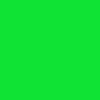

ID:570d3bb7-c037-4f9e-b6ff-0615c41fef6d
r: 15
g: 227
b: 52

In [165]:
Egg.New()

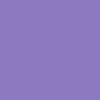

ID:537ddc52-a87b-4854-98e4-5a83a30925dd
r: 140
g: 121
b: 192

In [166]:
Egg.New()

In [167]:
foo = Egg()

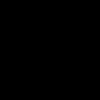

ID:baf9bdf9-1a2b-42e4-b047-c2afc50fa16e
r: 0
g: 0
b: 0

In [168]:
foo

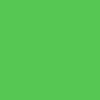

ID:b76ad7f6-65f6-477e-a780-4d9a75531e22
r: 86
g: 199
b: 83

In [176]:
Egg(0,0,0).Breed(Egg(255, 255, 255))

In [203]:
int('{0:b}'.format(255), 2)

255

In [140]:
from IPython.display import display

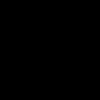

In [141]:
display(Egg().Show())

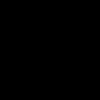

In [90]:
Egg().Show()

In [93]:
myList = []
for i in range(10):
    myList.append(Egg(random.randint(0,255), random.randint(0,255), random.randint(0,255)).Show())
    

In [19]:
from PIL import Image

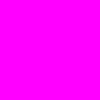

In [42]:
Image.new(mode='RGB', size=(100,100), color=(255,0,255))